In [64]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
cwd = os.getcwd()
sep = os.sep

# Now you can import
from adin.ml import baselineComparison, train_test_split, models_roc_curves, create_results_df, explain_model
from adin.dl import plot_cm

In [66]:
import torch 
from adin.utils import set_seed 

def set_deterministic(seed):
    global current_seed
    global is_deterministic

    #FOR REPRODUCIBILITY:
    print(f"SETTING DETERMINISTIC MODE FOR REPRODUCIBILITY, SEED: {seed}")
    os.environ["CUBLAS_WORKSPACE_CONFIG"]=":16:8"
    torch.use_deterministic_algorithms(True)
    set_seed(seed)
    current_seed = seed 
    is_deterministic = True

set_deterministic(0)

SETTING DETERMINISTIC MODE FOR REPRODUCIBILITY, SEED: 0


In [4]:
from adin import ml_config
ml_params = ml_config.ML_config("lbfgs", "l2", 100, "linear", 1.0, 5, "euclidean", 100, -1, -1, 2, 0.7, 5)
ml_params

In [5]:
pardir = cwd.split(sep)[:-1]
pardir_str = ""
for elem in pardir:
    pardir_str += elem + sep 
pardir = pardir_str
pardir

'C:\\Users\\Utente\\Desktop\\E-ABIN\\'

In [6]:
import pandas as pd 

dataset_path = pardir + "use_case" + sep + "data" + sep + "parkinson"
datapath = dataset_path + sep + "preprocessed_data.csv"
df = pd.read_csv(datapath, index_col = 0)
df.head()

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,ACTB.3,ACTB.4,GAPDH.3,GAPDH.4,GAPDH.5,STAT1.2,STAT1.3,STAT1.4,STAT1.5,Target
GSM153404,114.5,64.4,206.3,507.0,34.5,135.3,75.1,4.6,780.1,5.2,...,3407.2,4776.4,1892.7,1484.3,1296.1,454.3,15.3,177.3,137.1,1
GSM153405,105.1,58.4,179.8,497.8,18.0,139.1,51.2,13.7,492.4,24.5,...,3677.0,4820.1,2634.1,2158.4,2082.6,442.2,18.8,205.7,147.0,0
GSM153406,145.7,52.5,192.0,346.3,40.1,163.8,72.0,38.3,1121.6,36.8,...,2890.4,4234.6,2830.6,2603.0,2255.6,349.8,33.4,213.6,125.4,0
GSM153407,168.7,45.4,263.6,430.7,40.5,183.9,54.7,7.2,1436.6,34.8,...,2283.4,4947.5,3824.0,1825.5,2658.9,223.5,8.5,104.1,88.5,1
GSM153408,94.3,51.3,211.9,485.5,22.8,138.9,83.0,5.2,1499.3,33.8,...,2862.8,3899.9,2843.0,2450.5,2165.9,587.1,42.9,324.3,156.8,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, dataset_path, test_size = 0.7, target_name = 'Target')
X_train.shape, X_test.shape

Loading train/test split from disk...


((31, 21225), (74, 21225))

In [8]:
# WITHOUT FEATURE EXTRACTION 
models_tuple, fig_roc, fig_box = baselineComparison(X_train, y_train, params = ml_params, grid_search=True)

Number of splits for cross-validation: 5
Unique classes in target: {np.int64(0): np.int64(16), np.int64(1): np.int64(15)}
Cross-validation splits:  5
Performing grid search for hyperparameter tuning...
Grid search for LR...
Performing grid search for LR with parameters: {'solver': ['liblinear', 'saga'], 'penalty': ['l2', 'l1', None], 'max_iter': [100, 200, 300]}


D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solve

Best parameters: {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.5111
Best model for LR: LogisticRegression(class_weight='balanced', solver='liblinear')
Grid search for KNN...
Performing grid search for KNN with parameters: {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best score: 0.6722
Best model for KNN: KNeighborsClassifier(metric='manhattan', n_neighbors=3)
Grid search for DT...
Performing grid search for DT with parameters: {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best score: 0.5250
Best model for DT: DecisionTreeClassifier(class_weight='balanced', max_depth=5)
Grid search for SVM...
Performing grid search for SVM with parameters: {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best score: 0.5333
Best model for SVM: SVC(C=10, class_weight='balanced', probabi

In [9]:
from sklearn.metrics import confusion_matrix 

models = {}
for model_name, model in models_tuple:
    models[model_name] = model
       
df_result = create_results_df(models, X_test, y_test)
df_result

,Model Name,Accuracy,F1,Sensitivity,Specificity,AUC score,Precision
3,SVM,36.49,0.37,40.00,33.33,0.62,35.00
0,LR,55.41,0.57,62.86,48.72,0.56,52.38
4,RF,50.00,0.52,57.14,43.59,0.52,47.62
1,KNN,44.59,0.48,54.29,35.90,0.45,43.18
2,DT,44.59,0.41,40.00,48.72,0.44,41.18


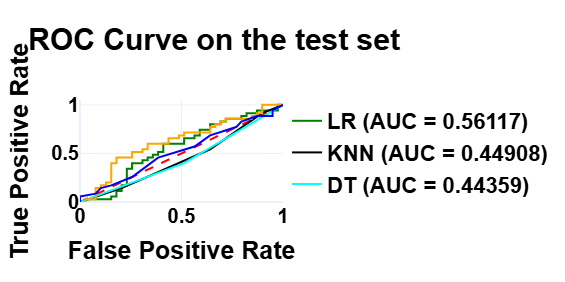

In [10]:
columns = [{'name': col, 'id': col} for col in df_result.columns]
data = df_result.to_dict(orient='records')
fig_roc_test, _, _ = models_roc_curves(models_tuple, X_test, y_test)
fig_roc_test

In [11]:
if "Target" in df.columns:
    df.drop("Target", axis = 1, inplace = True)
genes = df.columns
print(genes)

Index(['DDR1 /// MIR4640', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A',
       'MIR5193 /// UBA7', 'THRA', 'PTPN21', 'CCL5', 'CYP2E1',
       ...
       'ACTB.2', 'ACTB.3', 'ACTB.4', 'GAPDH.3', 'GAPDH.4', 'GAPDH.5',
       'STAT1.2', 'STAT1.3', 'STAT1.4', 'STAT1.5'],
      dtype='object', length=21225)


[[17 22]
 [15 20]]


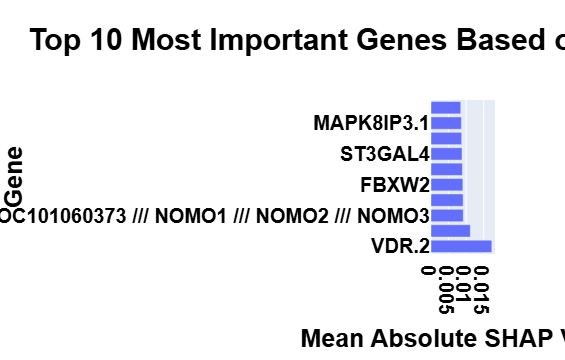

In [12]:
best_modelname = "RF"
best_model = models[best_modelname]
preds = best_model.predict(X_test)
classes = {0: "Normal", 1: "Anomalous"}
cm = confusion_matrix(y_test, preds)
print(cm)
fig_exp, shap_values = explain_model(best_model, best_modelname, X_train, genes, return_shap = True)
fig_exp

In [90]:
#

In [67]:
import numpy as np 
set_deterministic(0)
k = 20
top_genes = shap_values["Gene"].values[:k]
idxs = []
for gene in top_genes:
    idx = np.argwhere(genes == gene)
    idxs.append(idx[0][0])
idxs = np.array(idxs)
X_train_shap = X_train[:, idxs]
X_test_shap = X_test[:, idxs]
X_train_shap.shape, X_test_shap.shape

SETTING DETERMINISTIC MODE FOR REPRODUCIBILITY, SEED: 0


((31, 10), (74, 10))

In [68]:
# WITH FEATURE EXTRACTION 
models_tuple_shap, fig_roc, fig_box = baselineComparison(X_train_shap, y_train, params = ml_params, grid_search=True)

Number of splits for cross-validation: 5
Unique classes in target: {np.int64(0): np.int64(16), np.int64(1): np.int64(15)}
Cross-validation splits:  5
Performing grid search for hyperparameter tuning...
Grid search for LR...
Performing grid search for LR with parameters: {'solver': ['liblinear', 'saga'], 'penalty': ['l2', 'l1', None], 'max_iter': [100, 200, 300]}


D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solve

Best parameters: {'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.9111
Best model for LR: LogisticRegression(class_weight='balanced', solver='saga')
Grid search for KNN...
Performing grid search for KNN with parameters: {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Best score: 0.8028
Best model for KNN: KNeighborsClassifier(metric='manhattan')
Grid search for DT...
Performing grid search for DT with parameters: {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
Best parameters: {'max_depth': 5, 'min_samples_split': 5}
Best score: 0.7333
Best model for DT: DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5)
Grid search for SVM...
Performing grid search for SVM with parameters: {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8500
Best model for SVM: SVC(C=0.1, class_we

D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda3\envs\eabin12\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LR: 0.8167 (0.1160)
KNN: 0.8306 (0.1099)
DT: 0.7667 (0.2494)
SVM: 0.7833 (0.1319)
RF: 0.8667 (0.1633)
LR [0.75, 0.888888888888889, 0.7777777777777778, 1.0, 0.6666666666666667]
KNN [0.875, 1.0, 0.7777777777777778, 0.8333333333333333, 0.6666666666666667]
DT [1.0, 1.0, 0.8333333333333333, 0.6666666666666667, 0.33333333333333337]
SVM [0.5833333333333334, 0.888888888888889, 0.888888888888889, 0.888888888888889, 0.6666666666666667]
RF [1.0, 1.0, 0.6666666666666666, 1.0, 0.6666666666666667]
Best model: RF with roc_auc: 0.8667


In [69]:
models_shap = {}
for model_name, model in models_tuple_shap:
    models_shap[model_name] = model
       
df_result_shap = create_results_df(models_shap, X_test_shap, y_test)
df_result_shap

,Model Name,Accuracy,F1,Sensitivity,Specificity,AUC score,Precision
4,RF,63.51,0.62,62.86,64.10,0.74,61.11
0,LR,67.57,0.66,65.71,69.23,0.70,65.71
2,DT,64.86,0.67,74.29,56.41,0.65,60.47
1,KNN,58.11,0.60,65.71,51.28,0.63,54.76
3,SVM,58.11,0.63,74.29,43.59,0.61,54.17
